In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pywedge as pw
import bqplot

In [2]:
df = pd.read_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\FraudDetectionData.csv")

In [3]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of label Encoder
le = LabelEncoder()

# Using .fit_transform function to fit label and return encoded label
label = le.fit_transform(df['type'])

# removing the column 'type' from df as it is of no use now.
df.drop("type", axis=1, inplace=True)

# Appending the array to our dataFrame with column name 'type'
df["type"] = label

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameDest'])
label
df.drop("nameDest", axis=1, inplace=True)
df["nameDest"] = label

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['nameOrig'])
label
df.drop("nameOrig", axis=1, inplace=True)
df["nameOrig"] = label

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop('isFraud', axis=1)
# Separate the target variable
y = df['isFraud']

# Print class distribution before split
print(y.value_counts(normalize=True))

from sklearn.model_selection import train_test_split

# Assuming X contains your features and y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=18)

# Print class distribution after split
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.998709
1    0.001291
Name: isFraud, dtype: float64
0    0.99871
1    0.00129
Name: isFraud, dtype: float64


In [7]:
import random
random.seed (20)
import numpy as np
from scipy import stats

# Specify columns with outliers
cols_with_outliers = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Specify the number of bootstrapped samples to create per column
num_samples = 50

# Specify the right trimming proportions for each column
trim_props = {'amount': 0.14, 'oldbalanceOrg': 0.24, 'newbalanceOrig': 0.25, 'oldbalanceDest': 0.22, 'newbalanceDest': 0.22}

# Initialize empty dictionaries to store the trimmed means for each column
train_trimmed_means = {}

# Loop over the specified columns
for col_name in cols_with_outliers:
    
    # Check if the trimming proportion for this column is 0
    if trim_props[col_name] == 0:
        # If so, skip this column and move on to the next one
        continue
    
    # Initialize empty lists to store the bootstrapped samples and the trimmed means for the training set
    train_bootstrapped_samples = []
    train_trimmed_means_list = []
    
    # Loop over the number of desired samples
    for i in range(num_samples):
        # Randomly select indices from the column in the training set
        train_sample_indices = np.random.choice(X_train.index, size=len(X_train), replace=True)
        
        # Create a bootstrapped sample by indexing into the column with the selected indices for the training set
        train_sample = X_train.loc[train_sample_indices, col_name]
        
        # Append the bootstrapped samples to the list for the training set
        train_bootstrapped_samples.append(train_sample)
        
        # Calculate the right trimmed mean of the bootstrapped sample for the training set
        train_right_trimmed_mean = np.mean(train_sample[train_sample <= np.percentile(train_sample, 100*(1-trim_props[col_name]))])
        train_trimmed_means_list.append(train_right_trimmed_mean)
        
    # Calculate the mean of the right trimmed means for the training set and add it to the dictionary
    train_trimmed_means[col_name] = np.mean(train_trimmed_means_list)

    # Replace the outliers in the training set with the trimmed means
    X_train.loc[X_train[col_name] > np.percentile(X_train[col_name], 100*(1-trim_props[col_name])), col_name] = train_trimmed_means[col_name]

# Print the trimmed means for each column separately for the training set
print("Train set trimmed means: ", train_trimmed_means)

Train set trimmed means:  {'amount': 84280.50196164714, 'oldbalanceOrg': 17614.47385958504, 'newbalanceOrig': 12168.149675355335, 'oldbalanceDest': 190957.73043537288, 'newbalanceDest': 245186.62287928798}


In [8]:
X_train.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\trainNEW2.csv", index=False)
X_test.to_csv(r"C:\Users\23059\OneDrive\Desktop\Amiira\Y3S1\fyp\testNEW2.csv", index=False)

## Feature selection

In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier (n_estimators=150,random_state=18)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=150, random_state=18)

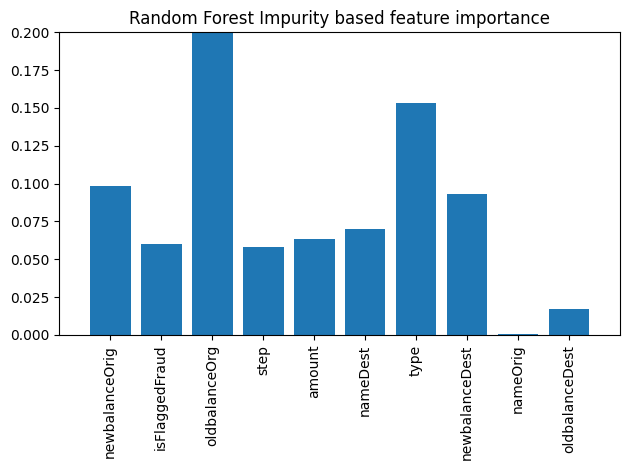

In [10]:
import matplotlib.pyplot as plt

# Get the feature importance values
importance_vals = rfc.feature_importances_

# Sort importance values
indices = np.argsort(importance_vals[::-1])

# Plot the feature importance of the forest
plt.figure()
plt.title("Random Forest Impurity based feature importance")
plt.bar(range(X.shape[1]), importance_vals[indices][::-1])

plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylim([0, 0.2])
plt.tight_layout()
plt.show()

## Ridge Regression

In [11]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your feature matrix and y_train is your target variable
# Standardize the feature matrix
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Initialize the RidgeCV model
model = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)

# Fit the model to the standardized feature matrix and target variable
model.fit(X_train_std, y_train)

# Print the best alpha value
print("Best alpha:", model.alpha_)

# Print the coefficients of the selected features along with their names
for feature_name, coefficient in zip(X_train.columns, model.coef_):
    print(feature_name, "coefficient:", coefficient)

Best alpha: 10.0
step coefficient: 0.0011151421360037482
amount coefficient: 0.0001442333158337507
oldbalanceOrg coefficient: 0.0007670880728952167
newbalanceOrig coefficient: -0.0007099976077346343
oldbalanceDest coefficient: -0.0005098556837274118
newbalanceDest coefficient: -0.00037373521998793275
isFlaggedFraud coefficient: 0.001549884855073589
type coefficient: 0.0017146326186298934
nameDest coefficient: -0.0020643014986762216
nameOrig coefficient: -2.1517739054051645e-05


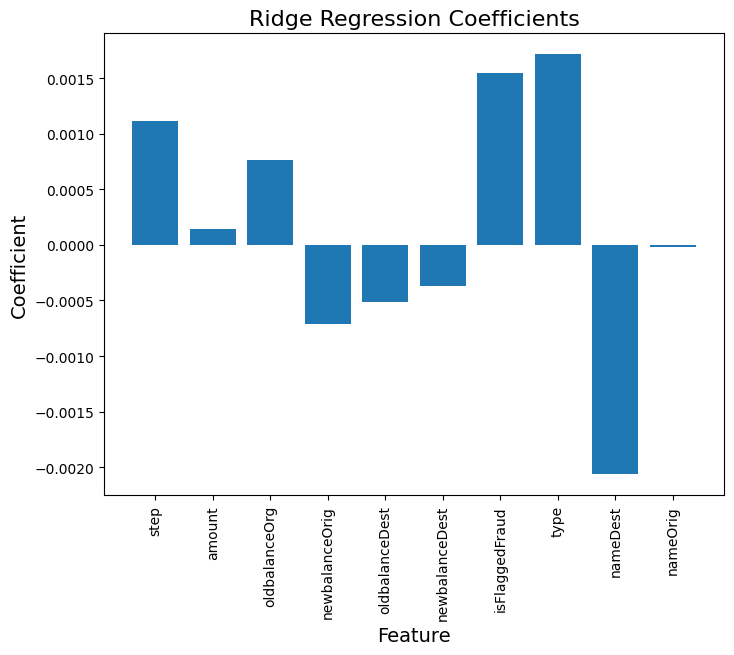

In [13]:
import matplotlib.pyplot as plt

# Create a bar chart of feature coefficients
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(X_train.columns, model.coef_)

# Set chart title and axis labels
ax.set_title("Ridge Regression Coefficients", fontsize=16)
ax.set_xlabel("Feature", fontsize=14)
ax.set_ylabel("Coefficient", fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the chart
plt.show()